<a href="https://colab.research.google.com/github/andreaco/SpokenDigitClassification/blob/master/SpokenDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spoken Digit Classification

## Imports and dataset download

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import librosa
from tqdm.notebook import tqdm
from IPython.display import Audio

In [3]:
! git clone https://github.com/Jakobovski/free-spoken-digit-dataset
#! pip install -r free-spoken-digit-dataset/pip_requirements.txt # probably not needed

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3166 (delta 3), reused 5 (delta 0), pack-reused 3157
Receiving objects: 100% (3166/3166), 23.92 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (72/72), done.


## Dataset import 

The informations about the audio track are retrieved from the name using the following regexp
```python
'([0-9])+_([a-z]+)_([0-9]+).wav'
```
With this we can retrieve from the 3 groups
```python
# Digit Label
regexp.search(filename).group(1)
# Spearker Name (maybe we'll need this later while analyzing the data?)
regexp.search(filename).group(2)
# File Index
regexp.search(filename).group(3)
```


In [0]:
# recordings directory
directory = 'free-spoken-digit-dataset/recordings/'
# regexp matching {digitLabel}_{speakerName}_{index}.wav
regexp = re.compile('([0-9])+_([a-z]+)_([0-9]+).wav') 

labels = []
audios = []
indexes = []
sizes = []

# setup progress bar
pbar = tqdm(desc='Loading audio samples')
pbar.reset(total=len(os.listdir(directory))) 

for f in os.listdir(directory):
  if f.endswith(".wav"):
    labels.append(regexp.search(f).group(1))
    indexes.append(int(regexp.search(f).group(3)))
    x, sr = librosa.load(directory+f, sr=None)
    sizes.append(x.size)
    audios.append(x)
    pbar.update() # updates progress bar
pbar.refresh();

Here we're doing a train-test split using the conditions stated in the github repository

In [0]:
# python lists to np.ndarray
Y = np.asarray(labels)
X = np.asarray(audios)
I = np.asarray(indexes)

# condition stated in the git repository for the test/train subdivision
is_in_test  = I <= 4
is_in_train = I >  4

Y_test, Y_train = Y[is_in_test], Y[is_in_train]

X_test, X_train = X[is_in_test], X[is_in_train]

## Dataset Analysis

Audio length: max = 18262, min = 1148


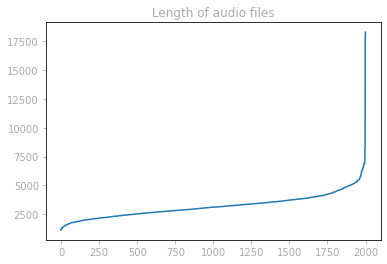

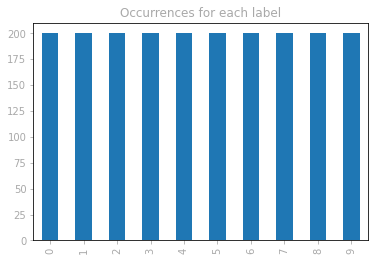

In [105]:
plt.title("Length of audio files")
plt.plot(np.sort(sizes))

# Histogram of occurrences
from collections import Counter
count = Counter(labels)
df = pd.DataFrame.from_dict(count, orient='index')
df.sort_index().plot(kind='bar', title='Occurrences for each label', legend=False)

# print min-max
argmax = np.argmax(sizes)
argmin = np.argmin(sizes)
print("Audio length: max = {}, min = {}".format(np.max(sizes), np.min(sizes)))

## Style

In [0]:
import matplotlib as mpl
COLOR = 'darkgrey'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR